In [8]:
import pandas as pd
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics 

import warnings
warnings.filterwarnings("ignore")
#Please ignore the warnings with version change




In [9]:
import os
os.chdir(r'C:\Users\vivek\Documents\I_Assignment2\Fraud_Detection')
# print(os.getcwd())
# print(os.listdir( ))

In [10]:
trainfile = 'Insurance_Fraud_TRAIN_3000.csv'
trainData = pd.read_csv(trainfile) #creates a dataframe from Train Data csv
testfile = 'Insurance_Fraud_TEST_12900.csv'
testData = pd.read_csv(testfile)  #creates a dataframe from Test Data csv


print(trainData.shape)
print(testData.shape)

(2999, 32)
(12918, 32)


In [11]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MONTH                 2999 non-null   object
 1   WEEKOFMONTH           2999 non-null   int64 
 2   DAYOFWEEK             2999 non-null   object
 3   MAKE                  2999 non-null   object
 4   ACCIDENTAREA          2999 non-null   object
 5   DAYOFWEEKCLAIMED      2999 non-null   object
 6   MONTHCLAIMED          2999 non-null   object
 7   WEEKOFMONTHCLAIMED    2999 non-null   int64 
 8   SEX                   2999 non-null   object
 9   MARITALSTATUS         2999 non-null   object
 10  AGE                   2999 non-null   int64 
 11  FAULT                 2999 non-null   object
 12  POLICYTYPE            2999 non-null   object
 13  VEHICLECATEGORY       2999 non-null   object
 14  VEHICLEPRICE          2999 non-null   object
 15  REPNUMBER             2999 non-null   

In [13]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12918 entries, 0 to 12917
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MONTH                 12918 non-null  object
 1   WEEKOFMONTH           12918 non-null  int64 
 2   DAYOFWEEK             12918 non-null  object
 3   MAKE                  12918 non-null  object
 4   ACCIDENTAREA          12918 non-null  object
 5   DAYOFWEEKCLAIMED      12918 non-null  object
 6   MONTHCLAIMED          12918 non-null  object
 7   WEEKOFMONTHCLAIMED    12918 non-null  int64 
 8   SEX                   12918 non-null  object
 9   MARITALSTATUS         12918 non-null  object
 10  AGE                   12918 non-null  int64 
 11  FAULT                 12918 non-null  object
 12  POLICYTYPE            12918 non-null  object
 13  VEHICLECATEGORY       12918 non-null  object
 14  VEHICLEPRICE          12918 non-null  object
 15  REPNUMBER             12918 non-null

In [14]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData.columns.values)
TestCols = list(testData.columns.values)
print(TrainCols)
print(TestCols)

['MONTH', 'WEEKOFMONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA', 'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'WEEKOFMONTHCLAIMED', 'SEX', 'MARITALSTATUS', 'AGE', 'FAULT', 'POLICYTYPE', 'VEHICLECATEGORY', 'VEHICLEPRICE', 'REPNUMBER', 'DEDUCTIBLE', 'DRIVERRATING', 'DAYS_POLICY_ACCIDENT', 'DAYS_POLICY_CLAIM', 'PASTNUMBEROFCLAIMS', 'AGEOFVEHICLE', 'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED', 'WITNESSPRESENT', 'AGENTTYPE', 'NUMBEROFSUPPLIMENTS', 'ADDRESSCHANGE_CLAIM', 'NUMBEROFCARS', 'YEAR', 'BASEPOLICY', 'FRAUDFOUND']
['MONTH', 'WEEKOFMONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA', 'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'WEEKOFMONTHCLAIMED', 'SEX', 'MARITALSTATUS', 'AGE', 'FAULT', 'POLICYTYPE', 'VEHICLECATEGORY', 'VEHICLEPRICE', 'REPNUMBER', 'DEDUCTIBLE', 'DRIVERRATING', 'DAYS_POLICY_ACCIDENT', 'DAYS_POLICY_CLAIM', 'PASTNUMBEROFCLAIMS', 'AGEOFVEHICLE', 'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED', 'WITNESSPRESENT', 'AGENTTYPE', 'NUMBEROFSUPPLIMENTS', 'ADDRESSCHANGE_CLAIM', 'NUMBEROFCARS', 'YEAR', 'BASEPOLICY', 'F

In [15]:
# Seperate Target column from Train Data
Xtrain = trainData[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = trainData[['FRAUDFOUND']].copy()
print("Train Set shape:")
print(Xtrain.shape)
print(Ytrain.shape)
Xtest = testData[TestCols[0:len(TestCols)-1]].copy()
Ytest = testData[['FRAUDFOUND']].copy()
print("Test Set shape:")
print(Xtest.shape)
print(Ytest.shape)

Train Set shape:
(2999, 31)
(2999, 1)
Test Set shape:
(12918, 31)
(12918, 1)


In [16]:
pd.value_counts(trainData.FRAUDFOUND, normalize = True)

No     0.866956
Yes    0.133044
Name: FRAUDFOUND, dtype: float64

No     2600
Yes     399
Name: FRAUDFOUND, dtype: int64


Text(0.5, 1.0, 'Distribution of Target column values in train data before split')

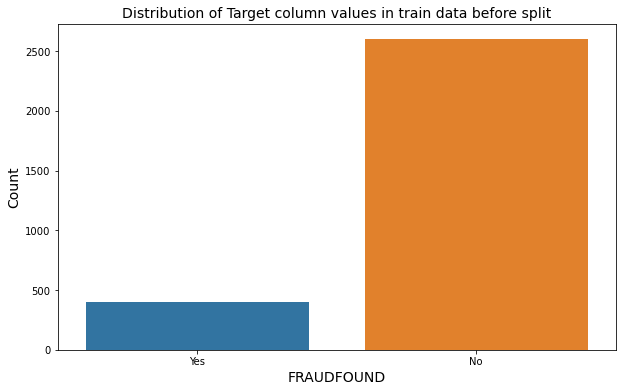

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

print(trainData['FRAUDFOUND'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x=trainData['FRAUDFOUND'])
plt.xlabel('FRAUDFOUND', size=14)
plt.ylabel('Count', size=14 )
plt.title('Distribution of Target column values in train data before split', size=14)

In [18]:
pd.value_counts(testData.FRAUDFOUND, normalize = True)

No     0.961449
Yes    0.038551
Name: FRAUDFOUND, dtype: float64

No     12420
Yes      498
Name: FRAUDFOUND, dtype: int64


Text(0.5, 1.0, 'Distribution of Target column values in test data before split')

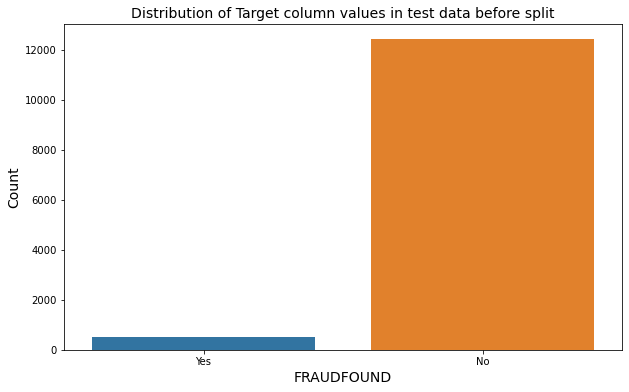

In [19]:
print(testData['FRAUDFOUND'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x=testData['FRAUDFOUND'])
plt.xlabel('FRAUDFOUND', size=14)
plt.ylabel('Count', size=14 )
plt.title('Distribution of Target column values in test data before split', size=14)

In [20]:
## try merging both plots to get an holistic picture.
# import matplotlib.pyplot as plt

# plt.rcParams["figure.figsize"] = [100, 6]
# plt.rcParams["figure.autolayout"] = True

# x = np.linspace(-100, 100, 100)
# y1 = sns.countplot(x=trainData['FRAUDFOUND'])
# y2 = sns.countplot(x=testData['FRAUDFOUND'])

# plt.subplot(211)
# plt.plot(x, y1, color='red', lw=5)
# plt.plot(x, y2, color='orange', lw=7)

# plt.show()

In [21]:
#List of Categorical Features
categoricalFeatures = [ 'MONTH', "DAYOFWEEK", "MAKE", "ACCIDENTAREA", "DAYOFWEEKCLAIMED", "MONTHCLAIMED", "SEX", \
                       "MARITALSTATUS", "FAULT", "POLICYTYPE", "VEHICLECATEGORY", "VEHICLEPRICE", "DAYS_POLICY_ACCIDENT", \
                       "DAYS_POLICY_CLAIM", "PASTNUMBEROFCLAIMS", "AGEOFVEHICLE", "AGEOFPOLICYHOLDER", "POLICEREPORTFILED", \
                       "WITNESSPRESENT", "AGENTTYPE", "NUMBEROFSUPPLIMENTS", "ADDRESSCHANGE_CLAIM", "NUMBEROFCARS", \
                       "BASEPOLICY"]
# print(categoricalFeatures)
# print(len(categoricalFeatures)) --24

In [22]:
# OneHotEncoding on Train (fit & transform)
# OneHotEncoding is to be done on Categorical variables.
OHe = OneHotEncoder(handle_unknown='ignore',sparse=False)
Xcat = pd.DataFrame(OHe.fit_transform(Xtrain[categoricalFeatures]),columns=OHe.get_feature_names(),index=Xtrain.index)
Xtrain = pd.concat([Xtrain,Xcat],axis=1)
Xtrain.drop(labels=categoricalFeatures,axis=1,inplace=True)
Xtrain.sample(5)

,WEEKOFMONTH,WEEKOFMONTHCLAIMED,AGE,REPNUMBER,DEDUCTIBLE,DRIVERRATING,YEAR,x0_Apr,x0_Aug,x0_Dec,...,x21_4_to_8_years,x21_no_change,x21_under_6_months,x22_1-vehicle,x22_2-vehicles,x22_3_to_4,x22_5_to_8,x23_All_Perils,x23_Collision,x23_Liability
724,4,5,44,10,400,4,1995,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1015,2,3,50,10,400,1,1994,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1941,1,3,45,11,400,1,1995,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1354,2,2,50,5,400,2,1995,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1159,2,2,30,14,400,2,1994,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
# OneHotEncoding on Test (only transform)
# OneHotEncoding is to be done on Categorical variables.
Xcat = pd.DataFrame(OHe.transform(Xtest[categoricalFeatures]),columns=OHe.get_feature_names(),index=Xtest.index)
Xtest = pd.concat([Xtest,Xcat],axis=1)
Xtest.drop(labels=categoricalFeatures,axis=1,inplace=True)
Xtest.sample(5)

,WEEKOFMONTH,WEEKOFMONTHCLAIMED,AGE,REPNUMBER,DEDUCTIBLE,DRIVERRATING,YEAR,x0_Apr,x0_Aug,x0_Dec,...,x21_4_to_8_years,x21_no_change,x21_under_6_months,x22_1-vehicle,x22_2-vehicles,x22_3_to_4,x22_5_to_8,x23_All_Perils,x23_Collision,x23_Liability
156,1,2,35,1,400,4,1994,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8420,1,4,80,3,400,4,1994,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2993,3,4,46,9,400,4,1996,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6832,5,1,39,15,400,1,1994,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6125,5,3,31,7,400,3,1994,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain, Ytrain)
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [25]:
rf = RandomForestClassifier()
rf.fit(Xtrain, Ytrain)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
#  Checking Accuracy over traine target attribute and [predicted values from Decision Tree model
test_Pred = dt.predict(Xtest)
train_Pred = dt.predict(Xtrain)
#Model Accuracy
print("Train Accuracy:", metrics.accuracy_score(Ytrain,train_Pred))
print("Test Accuracy:", metrics.accuracy_score(Ytest,test_Pred))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,test_Pred))
print("Max Depth",dt.get_depth())
print("Leaf",dt.get_n_leaves())
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, test_Pred))

Train Accuracy: 1.0
Test Accuracy: 0.8831088403777675
Confusion Matrix for Decision Tree:
[[10963  1457]
 [   53   445]]
Max Depth 25
Leaf 290
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       1.00      0.88      0.94     12420
         Yes       0.23      0.89      0.37       498

    accuracy                           0.88     12918
   macro avg       0.61      0.89      0.65     12918
weighted avg       0.97      0.88      0.91     12918



In [27]:
#  Checking Accuracy over traine target attribute and [predicted values from Random Forest model
test_Pred1 = rf.predict(Xtest)
train_Pred1 = rf.predict(Xtrain)
#Model Accuracy
print("Train Accuracy:", metrics.accuracy_score(Ytrain,train_Pred1))
print("Test Accuracy:", metrics.accuracy_score(Ytest,test_Pred1))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,test_Pred1))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, test_Pred1))

Train Accuracy: 1.0
Test Accuracy: 0.9643907725654126
Confusion Matrix for Decision Tree:
[[12038   382]
 [   78   420]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.99      0.97      0.98     12420
         Yes       0.52      0.84      0.65       498

    accuracy                           0.96     12918
   macro avg       0.76      0.91      0.81     12918
weighted avg       0.98      0.96      0.97     12918



Decision Tree: Random & Grid Search

In [28]:
#Hyperparameter tuning done for decision tree classifier

#RANDOM SEARCH--------------------------------------------

import time
start_time = time.time()

print("RandomizedSearchCV-Decision tree")
parameters={'min_samples_leaf' : range(10,250,10),'max_depth': 
            range(5,25,2),'criterion':['gini','entropy']}
dt_random = RandomizedSearchCV(dt,parameters,n_iter=25,cv=5)
dt_random.fit(Xtrain, Ytrain)
grid_parm=dt_random.best_params_
print(grid_parm)
print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_random.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Decision tree
{'min_samples_leaf': 50, 'max_depth': 17, 'criterion': 'entropy'}
accuracy Score for Decision Tree:0.884115
--- 2.448269844055176 seconds ---


In [29]:
#GRID SEARCH----------------------------------------

import time
start_time = time.time()

print("GridSearchCV-Decision tree")
dt_grid = GridSearchCV(dt,parameters)
dt_grid.fit(Xtrain, Ytrain)
grid_parm1=dt_grid.best_params_
print(grid_parm1)
print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_grid.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

GridSearchCV-Decision tree
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 30}
accuracy Score for Decision Tree:0.897430
--- 51.53314757347107 seconds ---


In [30]:
#Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier 
dtRand = DecisionTreeClassifier(**grid_parm)
dtGrid = DecisionTreeClassifier(**grid_parm1)

dtRand.fit(Xtrain,Ytrain)
dtRand_predict = dtRand.predict(Xtest)
dtGrid.fit(Xtrain,Ytrain)
dtGrid_predict = dtGrid.predict(Xtest)

In [31]:
# Accuracy for Decision Tree using Random Search CV for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtRand_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtRand_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, dtRand_predict))
clf_cv_score = cross_val_score(dtRand, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.8841151881096145
Confusion Matrix for Decision Tree:
[[11255  1165]
 [  332   166]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.91      0.94     12420
         Yes       0.12      0.33      0.18       498

    accuracy                           0.88     12918
   macro avg       0.55      0.62      0.56     12918
weighted avg       0.94      0.88      0.91     12918

[0.74615385 0.73990385 0.54375    0.5        0.57594937]


In [39]:
# Accuracy for Decision Tree using Grid Search for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtGrid_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtGrid_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, dtGrid_predict))
clf_cv_score = cross_val_score(dtGrid, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.8974299427155906
Confusion Matrix for Decision Tree:
[[11427   993]
 [  332   166]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.92      0.95     12420
         Yes       0.14      0.33      0.20       498

    accuracy                           0.90     12918
   macro avg       0.56      0.63      0.57     12918
weighted avg       0.94      0.90      0.92     12918

[0.74615385 0.69807692 0.54182692 0.5        0.56962025]


In [40]:
#Hyperparameter tuning done for decision tree classifier

#RANDOM SEARCH-------------------------------------------- Model 2

import time
start_time = time.time()

print("RandomizedSearchCV-Decision tree")
parameters2={'min_samples_leaf' : range(10,300,20),'max_depth': 
            range(5,40,3),'criterion':['gini','entropy']}
dt_random = RandomizedSearchCV(dt,parameters2,n_iter=25,cv=5)
dt_random.fit(Xtrain, Ytrain)
grid_parm2=dt_random.best_params_
print(grid_parm2)
print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_random.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Decision tree
{'min_samples_leaf': 50, 'max_depth': 5, 'criterion': 'entropy'}
accuracy Score for Decision Tree:0.884115
--- 2.7023229598999023 seconds ---


In [41]:
#GRID SEARCH----------------------------------------Model2

import time
start_time = time.time()

print("GridSearchCV-Decision tree")
dt_grid = GridSearchCV(dt,parameters2)
dt_grid.fit(Xtrain, Ytrain)
grid_parm3=dt_grid.best_params_
print(grid_parm3)
print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_grid.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

GridSearchCV-Decision tree
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 30}
accuracy Score for Decision Tree:0.877380
--- 41.24731421470642 seconds ---


In [42]:
#Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier 
dtRand = DecisionTreeClassifier(**grid_parm2)
dtGrid = DecisionTreeClassifier(**grid_parm3)

dtRand.fit(Xtrain,Ytrain)
dtRand_predict = dtRand.predict(Xtest)
dtGrid.fit(Xtrain,Ytrain)
dtGrid_predict = dtGrid.predict(Xtest)

In [43]:
# Accuracy for Decision Tree using Random Search CV for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtRand_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtRand_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, dtRand_predict))
clf_cv_score = cross_val_score(dtRand, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.8841151881096145
Confusion Matrix for Decision Tree:
[[11255  1165]
 [  332   166]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.91      0.94     12420
         Yes       0.12      0.33      0.18       498

    accuracy                           0.88     12918
   macro avg       0.55      0.62      0.56     12918
weighted avg       0.94      0.88      0.91     12918

[0.74615385 0.73990385 0.54375    0.5        0.57594937]


In [44]:
# Accuracy for Decision Tree using Grid Search for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtGrid_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtGrid_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, dtGrid_predict))
clf_cv_score = cross_val_score(dtGrid, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.8773803994426381
Confusion Matrix for Decision Tree:
[[11162  1258]
 [  326   172]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.90      0.93     12420
         Yes       0.12      0.35      0.18       498

    accuracy                           0.88     12918
   macro avg       0.55      0.62      0.56     12918
weighted avg       0.94      0.88      0.90     12918

[0.74615385 0.69807692 0.54375    0.5        0.55696203]


In [45]:
#Hyperparameter tuning done for decision tree classifier

#RANDOM SEARCH-------------------------------------------- Model 3

import time
start_time = time.time()

print("RandomizedSearchCV-Decision tree")
parameters3={'min_samples_leaf' : range(10,300,20),'max_depth': 
            range(5,40,3),'criterion':['gini','entropy']}
dt_random = RandomizedSearchCV(dt,parameters3,n_iter=25,cv=5)
dt_random.fit(Xtrain, Ytrain)
grid_parm4=dt_random.best_params_
print(grid_parm4)
print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_random.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Decision tree
{'min_samples_leaf': 30, 'max_depth': 8, 'criterion': 'entropy'}
accuracy Score for Decision Tree:0.897430
--- 2.7390191555023193 seconds ---


In [46]:
#GRID SEARCH----------------------------------------Model3

import time
start_time = time.time()

print("GridSearchCV-Decision tree")
dt_grid = GridSearchCV(dt,parameters3)
dt_grid.fit(Xtrain, Ytrain)
grid_parm5=dt_grid.best_params_
print(grid_parm5)
print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_grid.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

GridSearchCV-Decision tree
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 30}
accuracy Score for Decision Tree:0.877380
--- 40.05531716346741 seconds ---


In [47]:
#Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier 
dtRand = DecisionTreeClassifier(**grid_parm4)
dtGrid = DecisionTreeClassifier(**grid_parm5)

dtRand.fit(Xtrain,Ytrain)
dtRand_predict = dtRand.predict(Xtest)
dtGrid.fit(Xtrain,Ytrain)
dtGrid_predict = dtGrid.predict(Xtest)

In [48]:
# Accuracy for Decision Tree using Random Search CV for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtRand_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtRand_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, dtRand_predict))
clf_cv_score = cross_val_score(dtRand, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.8974299427155906
Confusion Matrix for Decision Tree:
[[11427   993]
 [  332   166]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.92      0.95     12420
         Yes       0.14      0.33      0.20       498

    accuracy                           0.90     12918
   macro avg       0.56      0.63      0.57     12918
weighted avg       0.94      0.90      0.92     12918

[0.74615385 0.69807692 0.54182692 0.50240385 0.56962025]


In [49]:
# Accuracy for Decision Tree using Grid Search for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtGrid_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtGrid_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, dtGrid_predict))
clf_cv_score = cross_val_score(dtGrid, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.8773803994426381
Confusion Matrix for Decision Tree:
[[11162  1258]
 [  326   172]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.90      0.93     12420
         Yes       0.12      0.35      0.18       498

    accuracy                           0.88     12918
   macro avg       0.55      0.62      0.56     12918
weighted avg       0.94      0.88      0.90     12918

[0.74615385 0.69807692 0.54375    0.5        0.55696203]


In [33]:
### ---------------------starting Random Forest Model -----------------------------------------

Random Forest: Random & Grid Search

In [34]:
#Hyperparameter tuning done for random forest classifier

#RANDOM SEARCH-------------------------------------------- Model1

import time
start_time = time.time()

print("RandomizedSearchCV-Random forest")
rand_parameters={'min_samples_leaf' : range(10,300,10),'max_depth': 
            range(1,10,2),'max_features':[10,20,30],'n_estimators':[20,30,40]}
rf_random = RandomizedSearchCV(rf,rand_parameters,n_iter=25,cv=5)
rf_random.fit(Xtrain, Ytrain)
grid_parm=rf_random.best_params_
print(grid_parm)
print("accuracy Score for Decision Tree:{0:6f}".
      format(rf_random.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Random forest
{'n_estimators': 40, 'min_samples_leaf': 10, 'max_features': 20, 'max_depth': 7}
accuracy Score for Decision Tree:0.941400
--- 8.25679636001587 seconds ---


In [35]:
#GRID SEARCH----------------------------------------

import time
start_time = time.time()

print("GridSearchCV-Random Forest")
rf_grid = GridSearchCV(rf,rand_parameters)
rf_grid.fit(Xtrain, Ytrain)
grid_parm1=rf_grid.best_params_
print(grid_parm1)
print("accuracy Score for Decision Tree:{0:6f}".
      format(rf_grid.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

GridSearchCV-Random Forest
{'max_depth': 5, 'max_features': 30, 'min_samples_leaf': 10, 'n_estimators': 30}
accuracy Score for Decision Tree:0.927156
--- 514.4113848209381 seconds ---


In [36]:
#Using the parameters obtained from HyperParameterTuning in the RandomForestClassifier 
rfRand = RandomForestClassifier(**grid_parm)
rfGrid = RandomForestClassifier(**grid_parm1)

rfRand.fit(Xtrain,Ytrain)
rfRand_predict = rfRand.predict(Xtest)
rfGrid.fit(Xtrain,Ytrain)
rfGrid_predict = rfGrid.predict(Xtest)

In [37]:
# Accuracy for Random Forest using Random Search CV for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,rfRand_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,rfRand_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, rfRand_predict))
clf_cv_score = cross_val_score(rfRand, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.9365226815296486
Confusion Matrix for Decision Tree:
[[11984   436]
 [  384   114]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.96      0.97     12420
         Yes       0.21      0.23      0.22       498

    accuracy                           0.94     12918
   macro avg       0.59      0.60      0.59     12918
weighted avg       0.94      0.94      0.94     12918

[0.70721154 0.68173077 0.54375    0.5        0.53164557]


In [38]:
# Accuracy for Random Forest using Grid Search for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,rfGrid_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,rfGrid_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, rfGrid_predict))

Test Accuracy: 0.9388450224492956
Confusion Matrix for Decision Tree:
[[12021   399]
 [  391   107]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.97      0.97     12420
         Yes       0.21      0.21      0.21       498

    accuracy                           0.94     12918
   macro avg       0.59      0.59      0.59     12918
weighted avg       0.94      0.94      0.94     12918



In [50]:
#Hyperparameter tuning done for random forest classifier

#RANDOM SEARCH-------------------------------------------- Model2

import time
start_time = time.time()

print("RandomizedSearchCV-Random forest")
rand_parameters2={'min_samples_leaf' : range(10,150,20),'max_depth': 
            range(2,20,2),'max_features':[10,20,40],'n_estimators':[10,30,40]}
rf_random = RandomizedSearchCV(rf,rand_parameters,n_iter=25,cv=5)
rf_random.fit(Xtrain, Ytrain)
grid_parm2=rf_random.best_params_
print(grid_parm2)
print("accuracy Score for Decision Tree:{0:6f}".
      format(rf_random.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Random forest
{'n_estimators': 40, 'min_samples_leaf': 30, 'max_features': 30, 'max_depth': 7}
accuracy Score for Decision Tree:0.930098
--- 10.084228515625 seconds ---


In [51]:
#GRID SEARCH----------------------------------------Model2

import time
start_time = time.time()

print("GridSearchCV-Random Forest")
rf_grid = GridSearchCV(rf,rand_parameters2)
rf_grid.fit(Xtrain, Ytrain)
grid_parm3=rf_grid.best_params_
print(grid_parm3)
print("accuracy Score for Decision Tree:{0:6f}".
      format(rf_grid.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

GridSearchCV-Random Forest
{'max_depth': 8, 'max_features': 40, 'min_samples_leaf': 30, 'n_estimators': 30}
accuracy Score for Decision Tree:0.927233
--- 232.05560398101807 seconds ---


In [52]:
#Using the parameters obtained from HyperParameterTuning in the RandomForestClassifier 
rfRand = RandomForestClassifier(**grid_parm2)
rfGrid = RandomForestClassifier(**grid_parm3)

rfRand.fit(Xtrain,Ytrain)
rfRand_predict = rfRand.predict(Xtest)
rfGrid.fit(Xtrain,Ytrain)
rfGrid_predict = rfGrid.predict(Xtest)

In [53]:
# Accuracy for Random Forest using Random Search CV for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,rfRand_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,rfRand_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, rfRand_predict))
clf_cv_score = cross_val_score(rfRand, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.9266914383031429
Confusion Matrix for Decision Tree:
[[11852   568]
 [  379   119]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.95      0.96     12420
         Yes       0.17      0.24      0.20       498

    accuracy                           0.93     12918
   macro avg       0.57      0.60      0.58     12918
weighted avg       0.94      0.93      0.93     12918

[0.75240385 0.64951923 0.54375    0.5        0.55063291]


In [54]:
# Accuracy for Random Forest using Grid Search for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,rfGrid_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,rfGrid_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, rfGrid_predict))

Test Accuracy: 0.9278526087629664
Confusion Matrix for Decision Tree:
[[11867   553]
 [  379   119]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.96      0.96     12420
         Yes       0.18      0.24      0.20       498

    accuracy                           0.93     12918
   macro avg       0.57      0.60      0.58     12918
weighted avg       0.94      0.93      0.93     12918



In [55]:
#Hyperparameter tuning done for random forest classifier

#RANDOM SEARCH-------------------------------------------- Model3

import time
start_time = time.time()

print("RandomizedSearchCV-Random forest")
rand_parameters3={'min_samples_leaf' : range(10,150,20),'max_depth': 
            range(2,20,2),'max_features':[10,20,40],'n_estimators':[10,30,40]}
rf_random = RandomizedSearchCV(rf,rand_parameters3,n_iter=25,cv=5)
rf_random.fit(Xtrain, Ytrain)
grid_parm4=rf_random.best_params_
print(grid_parm4)
print("accuracy Score for Decision Tree:{0:6f}".
      format(rf_random.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Random forest
{'n_estimators': 10, 'min_samples_leaf': 30, 'max_features': 40, 'max_depth': 18}
accuracy Score for Decision Tree:0.934123
--- 9.24172306060791 seconds ---


In [56]:
#GRID SEARCH----------------------------------------Model3

import time
start_time = time.time()

print("GridSearchCV-Random Forest")
rf_grid = GridSearchCV(rf,rand_parameters3)
rf_grid.fit(Xtrain, Ytrain)
grid_parm5=rf_grid.best_params_
print(grid_parm5)
print("accuracy Score for Decision Tree:{0:6f}".
      format(rf_grid.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

GridSearchCV-Random Forest
{'max_depth': 14, 'max_features': 40, 'min_samples_leaf': 30, 'n_estimators': 10}
accuracy Score for Decision Tree:0.926769
--- 257.343359708786 seconds ---


In [57]:
#Using the parameters obtained from HyperParameterTuning in the RandomForestClassifier 
rfRand = RandomForestClassifier(**grid_parm4)
rfGrid = RandomForestClassifier(**grid_parm5)

rfRand.fit(Xtrain,Ytrain)
rfRand_predict = rfRand.predict(Xtest)
rfGrid.fit(Xtrain,Ytrain)
rfGrid_predict = rfGrid.predict(Xtest)

In [58]:
# Accuracy for Random Forest using Random Search CV for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,rfRand_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,rfRand_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, rfRand_predict))
clf_cv_score = cross_val_score(rfRand, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.9281622542189193
Confusion Matrix for Decision Tree:
[[11873   547]
 [  381   117]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.96      0.96     12420
         Yes       0.18      0.23      0.20       498

    accuracy                           0.93     12918
   macro avg       0.57      0.60      0.58     12918
weighted avg       0.94      0.93      0.93     12918

[0.77115385 0.67451923 0.54375    0.5        0.55696203]


In [59]:
# Accuracy for Random Forest using Grid Search for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,rfGrid_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,rfGrid_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, rfGrid_predict))

Test Accuracy: 0.92638179284719
Confusion Matrix for Decision Tree:
[[11848   572]
 [  379   119]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.95      0.96     12420
         Yes       0.17      0.24      0.20       498

    accuracy                           0.93     12918
   macro avg       0.57      0.60      0.58     12918
weighted avg       0.94      0.93      0.93     12918

